In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 

In [3]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_42/interim_samples_42_plus.npz"

In [4]:
ds = load_dataset(fpath)

In [5]:
ds.keys()

dict_keys(['truth', 'hyper', 'samples'])

In [6]:
ds['samples'].keys()

dict_keys(['e2', 'e1'])

In [7]:
ds['samples']['e1'].shape

(10000, 300)

(array([3.185e+03, 2.771e+03, 1.998e+03, 1.175e+03, 5.490e+02, 2.400e+02,
        5.300e+01, 2.500e+01, 2.000e+00, 2.000e+00]),
 array([2.45001456, 2.62959726, 2.80917997, 2.98876267, 3.16834538,
        3.34792808, 3.52751079, 3.70709349, 3.8866762 , 4.0662589 ,
        4.24584161]),
 <BarContainer object of 10 artists>)

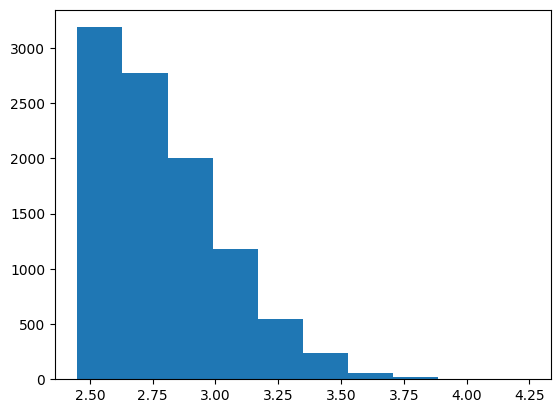

In [15]:
plt.hist(ds['truth']['lf'])

np.float64(0.02852462961917978)

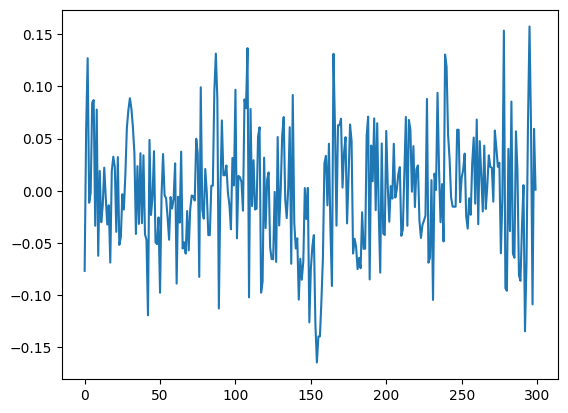

In [10]:
plt.plot(ds['samples']['e1'][5, :])
ds['truth']['e1'][5]

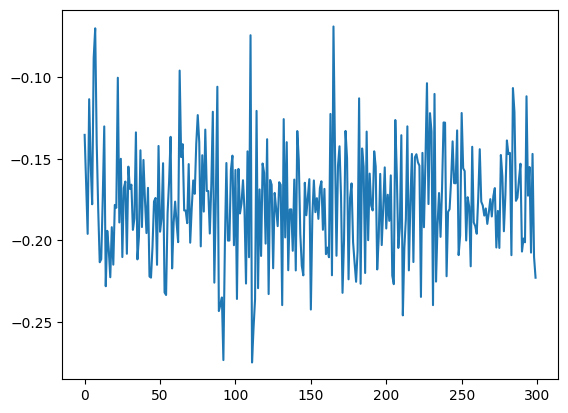

In [37]:
plt.plot(ds['samples']['e2'][5, :])

In [38]:
ds['truth']['e2'][5]

np.float64(-0.16704706227716148)

In [25]:
ds['truth']['lf']

array([2.86486785, 2.662339  , 2.7611502 , 2.86863357, 3.37153474,
       2.75626222, 2.94379159, 2.47108844, 2.52431915, 2.59457771])

# Jackknife

In [31]:
from bpd.io import load_dataset
import numpy as np

In [18]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_42/g_samples_jack_42.npz"

In [19]:
ds = load_dataset(fpath)

In [20]:
ds.keys()

dict_keys(['g_plus', 'g_minus'])

In [24]:
gp = ds['g_plus']
gm = ds['g_minus']

In [25]:
gp.shape, gm.shape

((100, 1000, 2), (100, 1000, 2))

In [26]:
g1 = 0.02

In [27]:
m_jack = (
    gp[..., 0].mean(axis=1) - gm[..., 0].mean(axis=1)
) / 2 / g1 - 1

In [33]:
m_jack.shape

(100,)

In [34]:
m_jack_std = np.sqrt(m_jack.var() * (100 - 1))
m_jack_std * 3

np.float64(0.023421534129539123)